## Skoods - AutoPilot NET Model 

In [1]:
import cv2
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_folder = r"C:\Users\Guilherme Bortolaso\Desktop\Skoods\Data\images/" ### Here is your images folder 

data = pd.read_csv(r"C:\Users\Guilherme Bortolaso\Desktop\Skoods\Data\airsim_rec.csv", sep="\t") ### Here is your data log 
steering = data["Steering"]
img_files = data["ImageFile"]


In [2]:
data_folder = r"C:\Users\Guilherme Bortolaso\Desktop\Skoods\Data\images/"
image_test = cv2.imread(data_folder + data["ImageFile"][0])

## Exploring the images and Pre Processing

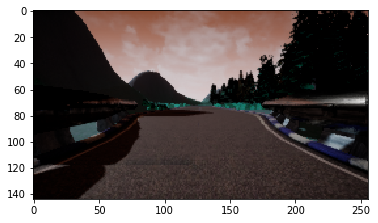

In [3]:
plt.imshow(image_test)

#print(data_folder+data["ImageFile"][0])

In [4]:
img_test = image_test[60:143,0:255]

## Croping Image and Images Dataset creation

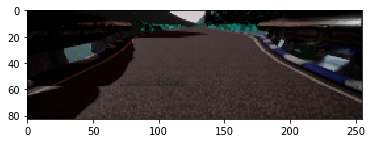

In [5]:
 plt.imshow(img_test)

In [6]:
images=[]
for image in data["ImageFile"]:
    transition_image = cv2.imread(data_folder + image)
    transition_image = transition_image[60:143,0:255]
    images.append(transition_image)


    

In [7]:
images=np.array(images)

In [8]:
images.shape

(1762, 83, 255, 3)

## Keras Model using Nvidia AutoPilot ConvNet


In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
import os

if os.path.exists( r"C:\Users\Guilherme Bortolaso\Desktop\Skoods\model.h5"):
  os.remove(r"C:\Users\Guilherme Bortolaso\Desktop\Skoods\model.h5")
else:
  print("The file does not exist")

X_train=images
y_train=np.array(steering)

######Model Start Here#################################################
model=Sequential()
model.add(Lambda(lambda x:x/255 -0.5, input_shape=(83,255,3)))

The file does not exist


C:\Users\Guilherme Bortolaso\AppData\Local\conda\conda\envs\google-ml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2), padding="valid")`
  
C:\Users\Guilherme Bortolaso\AppData\Local\conda\conda\envs\google-ml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2), padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Guilherme Bortolaso\AppData\Local\conda\conda\envs\google-ml\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2), padding="valid")`
  after removing the cwd from sys.path.
C:\Users\Guilherme Bortolaso\AppData\Local\conda\conda\envs\google-ml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `C

Train on 1409 samples, validate on 353 samples
Epoch 1/10
1409/1409 [==============================] - 6s 4ms/step - loss: 0.2912 - val_loss: 0.3282
Epoch 2/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.2390 - val_loss: 0.2953
Epoch 3/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.2200 - val_loss: 0.2912
Epoch 4/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1897 - val_loss: 0.3053
Epoch 5/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1894 - val_loss: 0.3066
Epoch 6/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1587 - val_loss: 0.2812
Epoch 7/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1368 - val_loss: 0.2610
Epoch 8/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1063 - val_loss: 0.2711
Epoch 9/10
1409/1409 [==============================] - 2s 1ms/step - loss: 0.1006 - val_loss: 0.2359
Epoch 10/10
1409/1409 [============

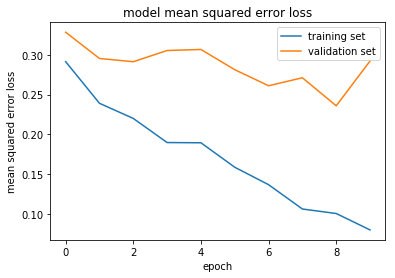

In [13]:
#####Nvidea AutoPilot ConvNet ###############################################
model.add(Convolution2D(24,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(36,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(48,5,5,border_mode='valid', activation='relu', subsample=(2,2)))
model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
model.add(Convolution2D(64,3,3,border_mode='valid', activation='relu', subsample=(1,1)))
model.add(Flatten())
model.add(Dense(1164, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))


model.compile(loss="mse",optimizer="adam") #Adam Opmizaer, no Learning rate set mannualy

#Training set splitted in a rate of 20% for validation
historic=model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=10,verbose=1)

print(historic.history.keys())
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

model.save("model.h5")